In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [28]:
np.random.seed(1)

### Implementacion de la clase Neural Network

In [67]:
class NeuralNetwork:
    def __init__(self, n, m, activacion) -> None:
        self.n = n
        self.m = m

        self.W1 = np.random.random((m, n))
        self.b1 = np.random.random((m, 1))

        self.W2 = np.random.random((1,m))
        self.b2 = np.random.random((1,1))

        self.activacion = activacion

    def sigmoid(self, x:'np.array'):
        return 1 / (1+np.exp(-x))
    
    def relu(self, x:'np.array'):
        return np.maximum(0,x)

    def forward(self, x:'np.array'):
        #si activacion es 0, usamos la funcion sigmoide y sino la relu.
        if (self.activacion == 0):
            capa1 = self.sigmoid((self.W1 @ x.reshape(-1, 1)) + self.b1)
        else:
            capa1 = self.relu((self.W1 @ x.reshape(-1, 1)) + self.b1)
        return (self.W2 @ capa1) + self.b2
    
    def funcion_objetivo(self, x:'np.array', y:float):
        loss = 1/2 * (self.forward(x) - y)**2
        return loss

    def numerical_gradient(self, x, y, eps=1e-3):
        ''' 
        Computa la derivada parcial de la funcion objetivo
        con respecto a cada uno de los parametros. 
        ------------
        Devuelve las derivadas en el orden (W1, b1, W2, b2)
        '''

        # Derivada con respecto a W1
        W1_derv = np.zeros(self.W1.shape)
        for i in range(self.m):
            for j in range(self.n):
                self.W1[i][j] += eps
                loss_mas = self.funcion_objetivo(x, y)
                self.W1[i][j] -= 2*eps
                loss_menos = self.funcion_objetivo(x, y)

                self.W1[i][j] += eps

                W1_derv[i][j] =  (loss_mas - loss_menos) / (2*eps)

        # Derivada con respecto a b1
        b1_derv = np.zeros(self.b1.shape)
        for j in range(self.m):
            self.b1[j] += eps
            loss_mas = self.funcion_objetivo(x, y)
            self.b1[j] -= 2*eps
            loss_menos = self.funcion_objetivo(x, y)

            self.b1[j] += eps

            b1_derv[j] =  (loss_mas - loss_menos) / (2*eps)

        # Derivada con respecto a W2
        W2_derv = np.zeros(self.W2.shape)
        for j in range(self.m):
            self.W2[0][j] += eps
            loss_mas = self.funcion_objetivo(x, y)
            self.W2[0][j] -= 2*eps
            loss_menos = self.funcion_objetivo(x, y)

            self.W2[0][j] += eps

            W2_derv[0][j] =  (loss_mas - loss_menos) / (2*eps)

        # Derivada con respecto a b2
        b2_derv = 0
        self.b2 += eps
        loss_mas = self.funcion_objetivo(x,y)
        self.b2 -= 2*eps
        loss_menos = self.funcion_objetivo(x,y)
        self.b2 += eps
        b2_derv = (loss_mas - loss_menos) / (2*eps)

        gradiente = (W1_derv, b1_derv, W2_derv, b2_derv)
        return gradiente
    
    def fit(self, x, y, learning_rate=0.001, epochs=1000, eps=1e-3):
        loss_accum = []
        for j in range(epochs):
            meanW1 = np.zeros(self.W1.shape)
            meanb1 = np.zeros(self.b1.shape)
            meanW2 = np.zeros(self.W2.shape)
            meanb2 = 0
            meanLoss = 0
            
            #para cada dato de entrenamiento, calculamos la derivada parcial en promedio.
            for i in range(len(x)): 
                W1, b1, W2, b2 = self.numerical_gradient(x[i], y[i], eps) 
                meanW1 += W1/len(x)
                meanb1 += b1/len(x)
                meanW2 += W2/len(x)
                meanb2 += b2/len(x)
                meanLoss += self.funcion_objetivo(x[i], y[i])/len(x)

            self.W1 -= learning_rate * meanW1
            self.b1 -= learning_rate * meanb1
            self.W2 -= learning_rate * meanW2
            self.b2 -= learning_rate * meanb2

            loss_accum.append(meanLoss)
            
        return loss_accum
        
    def predict(self, x):
        y = self.forward(x)
        return y
    
    # def plot(self, w, h):
    #     def nn_layout(g):
    #         layout = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0.5), (1, 1.5), (1, 2.5), (1, 3.5), (1, 4.5), (2, 2.5)]
    #         return layout


    #     # Create a graph object
    #     g = ig.Graph()
    #     g.add_vertices(self.n+self.m+1)

    #     W1_std = (self.W1 - self.W1.mean())/(self.W1.std())
    #     for i in range(self.n):
    #         for j in range(self.m):
    #             g.add_edge(i, j + self.n, weight=W1_std[i, j])  # Add edge with weight

    #     W2_std = (self.W2 - self.W2.mean())/(self.W2.std())
    #     for j in range(self.m):
    #         g.add_edge(j + self.n, self.m+self.n, weight=W2_std[0][j]) 

    #     # Get the custom layout
    #     layout = nn_layout(g)

    #     # Visualize the graph with the custom layout
    #     visual_style = {}
    #     visual_style["vertex_size"] = 20
    #     visual_style["vertex_color"] = "lightblue"
    #     visual_style["edge_color"] = ['green' if x > 0 else 'red' for x in g.es['weight']]
    #     visual_style["edge_width"] = [abs(x) for x in g.es['weight']]

    #     return ig.plot(g, layout=layout, bbox=(w, h), **visual_style)

        

Leemos el archivo .xlsx con el dataset

In [4]:
df = pd.read_excel('./Real estate valuation data set.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Dividimos el dataset en datos de entrenamiento y test. Creamos un dataset de entrenamiento mas chico para el tunning de hiperparámetros.

In [33]:
x_train = df.iloc[:315, 1:7]
y_train = df.iloc[:315, 7]
x_test = df.iloc[315:, 1:7]
y_test = df.iloc[315:, 7]

x_train_min = x_train[:50]
y_train_min = y_train[:50]

Normalizamos los datos de entrenamiento antes de entrenar la red

In [40]:
mean = np.mean(x_train_min, axis=0)
std = np.std(x_train_min, axis=0)
normalized_data_min = (x_train_min - mean) / std

Creamos una red distinta y entrenamos con diferentes hiperparámetros. Graficamos al final las respectivas funciones de perdidas para ver cómo se comportan durante el entrenamiento.

In [41]:
losses = []

for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
    for eps in [1e-2, 1e-3, 1e-4, 1e-5]:
        nn = NeuralNetwork(6, 5, 0)
        losses.append(nn.fit(normalized_data_min.to_numpy(), y_train.to_numpy(), learning_rate=learning_rate, eps=eps))

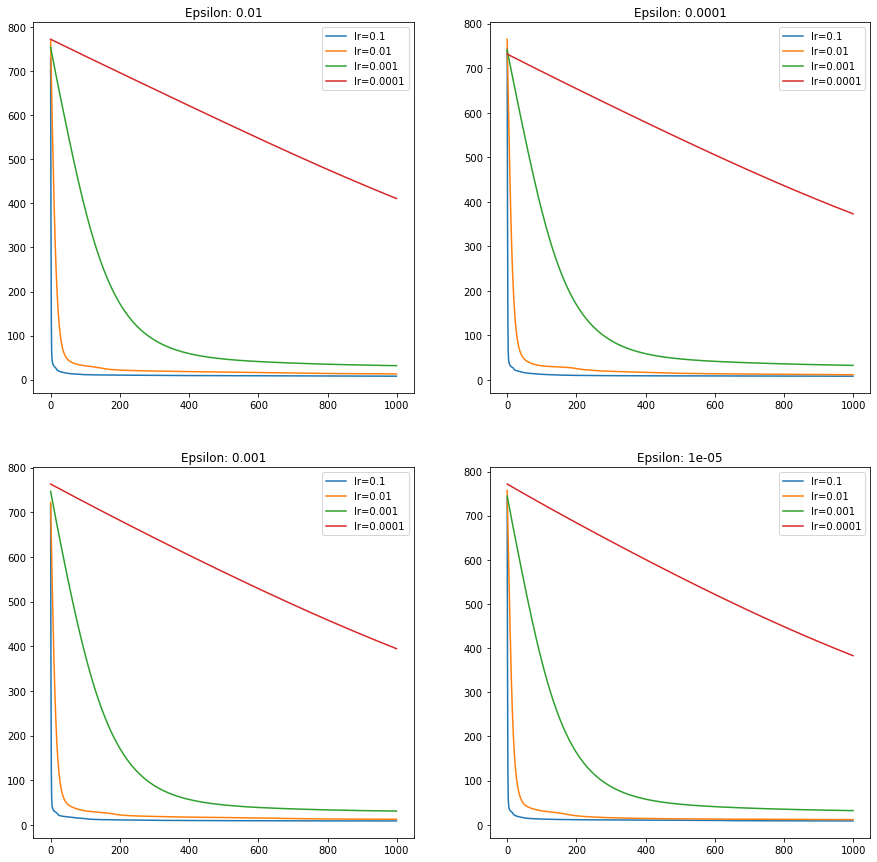

In [57]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 15)
i = 0

for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
    x1 = 0
    x2 = 0
    for eps in [1e-2, 1e-3, 1e-4, 1e-5]:
        loss = [v.flatten()[0] for v in losses[i]]
        ax[x1][x2].plot(loss, label=f'lr={learning_rate}')
        ax[x1][x2].set_title(f"Epsilon: {eps}")
        ax[x1][x2].legend()
        i += 1
        x1 += 1
        if x1 == 2:
            x1 = 0
            x2 = 1

plt.show()

In [65]:
data = []
i = 0
for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
    for eps in [1e-2, 1e-3, 1e-4, 1e-5]:
        loss = [v.flatten()[0] for v in losses[i]][-1]
        data.append([learning_rate, eps, loss])
        i += 1
min_loss = pd.DataFrame(data=data, columns=['learning rate','epsilon', 'min'])
# min_loss.append(data)

min_loss

,learning rate,epsilon,min
0,0.1000,0.01000,7.836896
1,0.1000,0.00100,8.902071
2,0.1000,0.00010,8.571380
3,0.1000,0.00001,8.499059
4,0.0100,0.01000,13.091146
5,0.0100,0.00100,12.644785
6,0.0100,0.00010,11.862530
7,0.0100,0.00001,11.572400
8,0.0010,0.01000,31.746761
9,0.0010,0.00100,31.005437


Los resultados muestran que las diferencias significativas en la función de pérdida se deben al learning rate y no al epsilon para calcular el gradiente. De ahora en mas usamos $\epsilon = 0.001$. A continuación volvemos a entrenar diferentes redes con todos los datos de entrenamiento y los learning rates con mejores resultados. También testeamos las dos funciones de activación (ReLu y Sigmoid). Sospechamos que los learning rates mas pequeños necesitan más datos de entrenamiento y/o epochs.

In [66]:
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
normalized_data = (x_train - mean) / std

In [68]:
redes = []
losses2 = []

for learning_rate in [0.1, 0.01, 0.001]:
    for activacion in [0, 1]:
        # 0=sigmoid, 1=ReLu
        nn = NeuralNetwork(6, 5, activacion)
        losses.append(nn.fit(normalized_data.to_numpy(), y_train.to_numpy(), learning_rate=learning_rate))
        redes.append(nn)

Ahora comparamos como se comportan respecto a los datos de test. Creamos la función para calcular el error cuadrático medio y comparamos los diferentes modelos.

In [ ]:
def ECM(nn, x_test, y_test):
    EC_acumulado = 0 
    for i in range(len(x_test)):
        x_predict = nn.predict(x_test.to_numpy()[i])
        EC_acumulado += (x_predict - y_test.to_numpy()[i])**2

    return EC_acumulado/len(x_test)
        

In [27]:
mean_test = np.mean(x_test, axis=0)
std_test = np.std(x_test, axis=0)
normalized_data_test = (x_test - mean_test) / std_test

In [26]:
ecms = []
i = 0

for learning_rate in [0.1, 0.01, 0.001]:
    for activacion in [0, 1]:
        nn_i = redes[i]
        ecms.append([ECM(nn_i, normalized_data_test, y_test), learning_rate, activacion])
        i += 1

ecmsDF  = pd.DataFrame(data=[ecms], columns=["ECM", "Learning rate", "Activacion"])

array([[65.95014034]])